In [20]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6527597144638054887
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16544897833176474858
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [21]:
#CNN
K.set_image_data_fromat('channels_first') #channels_last

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k

batch_size=128
num_classes=10
epochs=12
img_rows, img_clos=28, 28
(x_train, y_train),(x_test, y_test)=mnist.load_data()

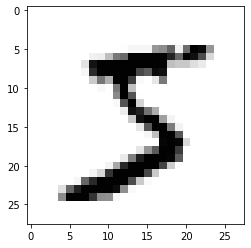

In [23]:
first_image=x_train[0,:,:]
plt.imshow(first_image, cmap=plt.cm.Greys)

In [24]:
##channel_first, channelllast
#X_train=X_train.reshape(X_train.shape[0],1,28,28)
#X_test=x_test.reshape(X_test.shape[0],1,28,28)

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32') #타입변경
x_test=x_test.astype('float32')
x_train /=255  #float32 로 타입변경 255로 나눠줘야 하기 때문에 
x_test /=255
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [25]:
model=Sequential()
#      32:아웃풋 필터 개수,3*3 :필터 사이즈 
#입력 :28 * 28 =>(128(128*1), 26(28-5+1), 26,32)  #valid,same(28,28):모서리 특징
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'  #음수가 제거 
                 ,input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
#128장 24(?) * 24 *64 
model.add(MaxPooling2D(pool_size=(2,2))) #128장,12,12,64
model.add(Dropout(0.25))
model.add(Flatten()) #12*12*64 =>1차원 9216
model.add(Dense(128,activation='relu')) #9216*128
#128 * 128
model.add(Dropout(0.5)) #계산회로만 생략:
model.add(Dense(10,activation='softmax')) #128*10 가중치 
#128*10

In [26]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.2577 - accuracy: 0.9198 - val_loss: 0.0543 - val_accuracy: 0.9826
Epoch 2/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0447 - val_accuracy: 0.9849
Epoch 3/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0651 - accuracy: 0.9804 - val_loss: 0.0387 - val_accuracy: 0.9866
Epoch 4/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0318 - val_accuracy: 0.9895
Epoch 5/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0296 - val_accuracy: 0.9895
Epoch 6/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 7/12
60000/60000 [==============================] - 8s 

In [27]:
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy']) #num_classes=10 때문에
#class AccuracyHistory(keras.callbacks.Callback):
#    def on_train_begin(self, logs={}): #훈련시작시 이벤으 반드시 이 함수를 써야함
#        self.acc=[]
#    def on_epoch_end(self,batch,logs={}):
#        self.acc.append(logs.get('acc'))
#history=AccuracyHistory()
#model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test), callbacks=[history])
#score=model.evaluate(x_test,y_test,verbose=0)
#score[0]
#score[1]
#plt.plot(range(1,11),history,acc)
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.show()
#
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# epoch 마다 accuracy 를 저장하게 해준다.  ( 안해도 별차니는 없다 ) 
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs={}): # 오버라이팅 ( -> 반드시 이름이 on_train_begin 으로 ! )
        self.acc=[]              #>> 훈련시작시 이벤트(on_train_begin) 가 발생하도록 발생했다 
    def on_epochs_end(self, batch, logs={}):   # epoch 하나 끝날때마다 하도록 설정 
        self.acc.append(logs.get('accuracy'))
history = AccuracyHistory()  # 인스턴스 해주고 아래 fit에 , callbacks에  history 지정한다.

model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test,y_test), callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0266 - val_accuracy: 0.9917
Epoch 2/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 3/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 0.0324 - val_accuracy: 0.9895
Epoch 4/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0281 - val_accuracy: 0.9916
Epoch 5/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0333 - val_accuracy: 0.9914
Epoch 6/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0276 - val_accuracy: 0.9918
Epoch 7/12
60000/60000 [==============================] - 8s 1

In [31]:
score=model.evaluate(x_test,y_test,verbose=0)
score[0]
score[1]
plt.plot(range(1,11),history,acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


IndexError: list index out of range

In [ ]:
#모델저장/로딩

In [32]:
#HDFS(hadoop file system ):model 구조전체 저장
#가중치 구조, optimization stage 등이 저장
#json 으로 저장, 구조 가중치를 별도로 저장 =>web 에서 tensorflow
model.save('model_mnist.h5')
print('모델이 저장되었습니다.')
from keras.models import load_model

model=load_model('model_mnist.h5')
print('모델이 로딩되었습니다.')

model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)         

In [33]:
#레이어 정보 확인
l1=model.layers[0]
l2=model.layers[1]
print(l1.name) #?
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x0000025E6B9ABAF8>
(None, 26, 26, 32)


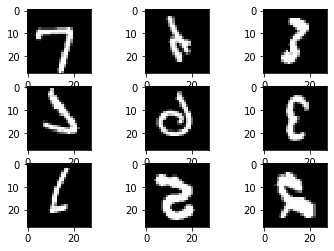

In [34]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
#datagen=ImageDataGenerator(width_shift_range=0.2,heigh_shift_range=0.2)
#이미지 백색화 =>noise 제거 (변수간 상관도를 없앰:PCA)

datagen.fit(X_train)
for X_batch,y_batch in datagen.flow(X_train,y_train,batch_size=9,
    #augment
    save_to_dir='Images',save_prefix='aug',save_format='png'):
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(X_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


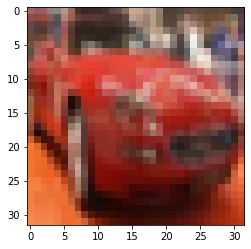

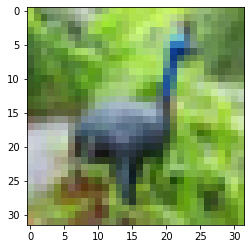

In [35]:
from keras.datasets import cifar10
from keras.optimizers import SGD,Adam,RMSprop
from keras.utils import np_utils
from keras.layers import Activation
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
#import

(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()
print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')
NB_CLASSES=10
Y_train=np_utils.to_categorical(Y_train,NB_CLASSES)
Y_test=np_utils.to_categorical(Y_test,NB_CLASSES)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255


plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [36]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32
BATCH_SIZE=128
NB_EPOCH=40
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

In [37]:
model=Sequential()
#residual 망의 영향을 받아서 
#32 * 32 =>32 * 32 * 32
model.add(Conv2D(32,kernel_size=3,padding='same',
                input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [38]:
model.add(Conv2D(32,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_23\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)       

In [40]:
history=model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
                 verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 8s 196us/step - loss: 1.6783 - accuracy: 0.3925 - val_loss: 1.2826 - val_accuracy: 0.5396
Epoch 2/40
40000/40000 [==============================] - 7s 176us/step - loss: 1.2463 - accuracy: 0.5549 - val_loss: 1.1392 - val_accuracy: 0.5929
Epoch 3/40
40000/40000 [==============================] - 7s 176us/step - loss: 1.0656 - accuracy: 0.6230 - val_loss: 1.2925 - val_accuracy: 0.5783
Epoch 4/40
40000/40000 [==============================] - 7s 176us/step - loss: 0.9509 - accuracy: 0.6672 - val_loss: 0.9947 - val_accuracy: 0.6476
Epoch 5/40
40000/40000 [==============================] - 7s 177us/step - loss: 0.8663 - accuracy: 0.6956 - val_loss: 0.8390 - val_accuracy: 0.7060
Epoch 6/40
40000/40000 [==============================] - 7s 176us/step - loss: 0.7962 - accuracy: 0.7208 - val_loss: 0.8228 - val_accuracy: 0.7183
Epoch 7/40
40000/40000 [==============================] - 7s 1

In [57]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(featurewise_center=False, #똑같은 데이터 
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False, #이미지 PCA 노이즈 제거
                           rotation_range=0,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False)
datagen.fit(X_train)
                           

In [58]:
model.fit_generator(datagen.flow(X_train, Y_train,
                                batch_size=BATCH_SIZE),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=NB_EPOCH,
                    verbose=VERBOSE)

TypeError: fit_generator() got an unexpected keyword argument 'samples_per_epoch'

In [ ]:
score=model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print('\nTest score:',score[0])
print('\nTest accuracy:',score[1])


In [ ]:
#json
model_json=model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5',overwrite=True)

In [ ]:
from keras.models import model_from_json
json_file=open('cifar10_architecture.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h5')
print('Loaded model from disk')

In [ ]:
#accuracy graph를 출력해보시오
이미지 cat dog를 다운로드한 다음 위의 모델로예측해보아라

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import numpy as np #이미지 사이즈 일치
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names=['cat.jpg','dog.jpg']
imgs=[resize(imread(img_name),(32,32)).astype('float32') for img_name in img_names]
imgs=np.array(imgs)
predicions=model.predict_classes(imgs)
print(predictions)


In [ ]:
#전이 (transfer learning ) 학습Application
반지도 학습 (일부데이터 라빌이 없음):knn, Trenductive SVM
가중치 활용: 그대로 적용
가중치 중 일부만 활용
가중치는 그대로 두고 FFNN부분만 학습해서 사용하기

In [ ]:
pre-trained model ,fine-tuning:FFNN 부분만 domain knowledge

In [ ]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size' , numpy_image.shape)

#차원확대 :여러장 처리
#1장 (3차원->4차원 으로 확장)
image_batch=np.expand_dims(numpy_image, axis=0)
print('image array size' , image_batch.shape)
#prepare the image for the resnet50 model
precessed_image = resnet50.preprocess_input(image_batch.copy())
#dense 을 이용하여 모델을 생성
#라벨->확률:
resnet_model = resnet50.ResNet50(weights = 'imagenet')
predictions = resnet_model.predict(precessed_image)
label = decode_predictions(predictions)
print(label)

In [ ]:
label = decode_predictions(predictions,top=3)
print(label)

In [ ]:
#ft.

In [41]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
# tf.enable_eager_execution()  -> 2.0 이 아닌경우 맨처음에 실행해줘야한다
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [42]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)
#data_dir = "C:/Users/ICT01_24/Documents/jeju/keras/pass/flowers/flower/flower_photos"
data_dir = pathlib.Path(data_dir)
label_names = {"daisy" : 0, "dandelion" : 1, "roses" : 2, "sunflowers" : 3, "tulips" : 4}
label_key = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

In [43]:
all_images = list(data_dir.glob('*/*')) #파일명로딩
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
#라벨을 할당
#디렉터리의 경로를 관리하는 라이브러리
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2) 
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
IMG_SIZE= 160
BATCH_SIZE = 32

In [44]:
def _parse_data(x,y):
    image = tf.read_file(x) #파일에는 헤더파일(압축방법)
    image = tf.image.decode_jpeg(image, channels= 3) #color
    image = tf.cast(image,tf.float32) #data를 나누기위해서 데이터형식 바꿔줌
    image = (image/127.5) -1 #0~2 -1 =>-1 ~1
    #이미지 사이즈를 통일시켜줌 160 * 160으로 조정해줌? 어디서?
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image,y 
def _input_fn(x,y):
    #기본단위요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x,y))  #dataset을 생성
    ds = ds.map(_parse_data) #데이터마다 함수를 적용할때 사용
    ds = ds.shuffle(buffer_size=data_size) #충분한 공간확보 ,buffer_size:거쳐가는 기억공간
    ds = ds.repeat() #데이터가 부족하면 처음부터 다시 시작
    ds = ds.batch(BATCH_SIZE) #미니배치사이즈
    ds = ds.prefetch(buffer_size=AUTOTUNE) #
    return ds
train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [45]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
#
VGG16_MODEL = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                          include_top=False, #include_top=False,인경우는 
                                          weights='imagenet') #모델을 만들지 않음.왜?VGG16로 만들어졌기때문에

In [46]:
VGG16_MODEL.trainable =False

#flattn 이 없음 대신 GlobalAveragePooling2D :모양을 유지한채 그대로 풀링된다
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#ffnn 의 가중치는 학습
prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax')

In [47]:
model=tf.keras.Sequential([  #model(vgg16 가중치+FFNN 가중치 학습)
    VGG16_MODEL, global_average_layer, prediction_layer])

In [48]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy']) #sparse_categorical_crossentropy :희소 행렬일때 (10개는 희소하지 않음 1000개 정도)

In [49]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2)

Train on 2 steps
Epoch 1/100
2/2 [==============================] - 9s 5s/step - loss: 1.8462 - acc: 0.1719
Epoch 2/100
2/2 [==============================] - 0s 166ms/step - loss: 1.8134 - acc: 0.1875
Epoch 3/100
2/2 [==============================] - 0s 154ms/step - loss: 1.6869 - acc: 0.2031
Epoch 4/100
2/2 [==============================] - 0s 154ms/step - loss: 1.5982 - acc: 0.2969
Epoch 5/100
2/2 [==============================] - 0s 157ms/step - loss: 1.6151 - acc: 0.2969
Epoch 6/100
2/2 [==============================] - 0s 155ms/step - loss: 1.5492 - acc: 0.3906
Epoch 7/100
2/2 [==============================] - 0s 155ms/step - loss: 1.5439 - acc: 0.3438
Epoch 8/100
2/2 [==============================] - 0s 155ms/step - loss: 1.5647 - acc: 0.3594
Epoch 9/100
2/2 [==============================] - 0s 157ms/step - loss: 1.5010 - acc: 0.4531
Epoch 10/100
2/2 [==============================] - 0s 155ms/step - loss: 1.6053 - acc: 0.2500
Epoch 11/100
2/2 [===========================

2/2 [==============================] - 0s 155ms/step - loss: 0.9406 - acc: 0.7969
Epoch 88/100
2/2 [==============================] - 0s 156ms/step - loss: 0.9969 - acc: 0.7031
Epoch 89/100
2/2 [==============================] - 0s 155ms/step - loss: 0.9208 - acc: 0.7188
Epoch 90/100
2/2 [==============================] - 0s 155ms/step - loss: 0.9115 - acc: 0.7656
Epoch 91/100
2/2 [==============================] - 0s 155ms/step - loss: 0.9764 - acc: 0.7500
Epoch 92/100
2/2 [==============================] - 0s 156ms/step - loss: 0.8863 - acc: 0.7969
Epoch 93/100
2/2 [==============================] - 0s 156ms/step - loss: 0.9761 - acc: 0.7344
Epoch 94/100
2/2 [==============================] - 0s 155ms/step - loss: 0.9026 - acc: 0.7500
Epoch 95/100
2/2 [==============================] - 0s 155ms/step - loss: 0.9328 - acc: 0.7656
Epoch 96/100
2/2 [==============================] - 0s 154ms/step - loss: 0.9704 - acc: 0.7500
Epoch 97/100
2/2 [==============================] - 0s 155ms/st

KeyError: 'val_acc'

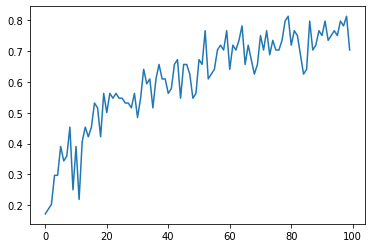

In [56]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','test',loc='upper left')
plt.show()